                                                        E   D   A

Recopilación de datos: El primer paso es recopilar los datos que se analizarán. Los datos pueden provenir de diversas fuentes, como bases de datos, archivos CSV o Excel, o webscrapping, entre otros.

Limpieza de datos: Una vez que tenga los datos, es importante limpiarlos. Esto significa eliminar datos faltantes o erróneos, corregir errores de formato y estandarizar la información.

Análisis exploratorio: El análisis exploratorio implica explorar los datos para comprender su distribución, la relación entre las variables y cualquier patrón o tendencia. Se pueden utilizar técnicas estadísticas y gráficas para visualizar y resumir los datos.

Visualización de datos: La visualización de datos es una parte clave del EDA, ya que puede ayudar a identificar patrones y tendencias en los datos. Se pueden utilizar diferentes tipos de gráficos y visualizaciones, como histogramas, diagramas de dispersión y diagramas de caja y bigotes, entre otros.

Modelado de datos: Finalmente, puede utilizar los datos limpios y analizados para construir modelos que puedan predecir resultados futuros. Estos modelos pueden basarse en técnicas estadísticas o de aprendizaje automático.

In [1]:
#Importamos las librerias a usar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset_plataformas.csv')

Normalizo los datasets 

la columna 'duration_type' tiene season y seasons, normalizo con season

In [4]:
df['duration_type'] = df['duration_type'].replace('seasons', 'season')

In [5]:
df.isnull().sum()

id                   0
show_id              0
type                 0
title                0
director          8259
cast              5321
country          11499
date_added        9554
release_year         0
rating               0
listed_in            0
description          4
duration_int         0
duration_type      482
score                0
dtype: int64

Hay valores en la columna 'rating_x' que parecen corresponder a otra columna, por ejemplo '93 mins' pareciera corresponder a las columnas duration_int y duration_type. Por el momento las clasifico como 'unrated'

In [8]:
df['rating'].unique()

array(['g', 'pg', 'pg-13', 'tv-14', 'tv-y7', 'tv-y', 'tv-y7-fv', '13+',
       'all_ages', '18+', 'r', 'unrated', '16+', '7+', 'tv-ma', 'nc-17'],
      dtype=object)

In [7]:
for rating in df['rating'].unique():
    if rating.endswith('min'):
        filtro = df['rating'] == rating
        df.loc[filtro, ['duration_type']] = 'min'
        df.loc[filtro, ['duration_int']] = int(rating[:-4])
        df.loc[filtro, ['rating']] = 'unrated'
    elif rating.endswith('season') or rating.endswith('seasons'):
        filtro = df['rating'] == rating
        df.loc[filtro, ['duration_type']] = 'season'
        df.loc[filtro, ['duration_int']] = int(rating.split()[0])
        df.loc[filtro, ['rating']] = 'unrated'

filtro = df['rating'] == 'not_rate'
filtro2 = df['rating'] == 'not rated'
df['rating'] = df['rating'].replace('not_rate', 'unrated')
df['rating'] = df['rating'].replace('not rated', 'unrated')

df['rating'] = df['rating'].replace('tv-pg', 'pg')
df['rating'] = df['rating'].replace('tv-g', 'g')
df['rating'] = df['rating'].replace('tv-nr', 'unrated')
df['rating'] = df['rating'].replace('nr', 'unrated')
df['rating'] = df['rating'].replace('ur', 'unrated')
df['rating'] = df['rating'].replace('16', '16+')
df['rating'] = df['rating'].replace('ages_16_', '16+')
df['rating'] = df['rating'].replace('18', '18+')
df['rating'] = df['rating'].replace('ages_18_', '18+')
df['rating'] = df['rating'].replace('all', 'all_ages')

In [9]:
cantidad_unrated = df['rating'] == 'unrated'
cantidad_unrated.sum()

744

solo tengo faltantes de duracion en formato peliculas. Son 197 faltantes en total

In [10]:
df.to_csv('dataset_plataformas_final.csv', index = False)

Analisis del dataset

In [11]:
df.describe()

,release_year,duration_int,score
count,22998.000000,22998.000000,22998.000000
mean,2010.811244,66.613271,3.533286
std,15.401142,51.420367,0.056929
min,1920.000000,0.000000,3.300000
25%,2010.000000,3.000000,3.500000
50%,2016.000000,84.000000,3.500000
75%,2019.000000,101.000000,3.600000
max,2021.000000,601.000000,3.700000


Para un mejor analisis me conviene separar en 'movie' y en 'tv show' ya que en 'duration_int' estoy comparando numero de temporadas vs minutos de duración.

In [12]:
df_movie = df[df['type'] == 'movie']
#quito los que tiene faltante de duracion ya que interfieren en los analisis
durint_zero = df_movie['duration_int']
mask = durint_zero == 0
df_movie_f = df_movie[~mask]
print(df_movie.describe())
df_movie_f.describe()

       release_year  duration_int         score
count  16481.000000  16481.000000  16481.000000
mean    2009.224562     92.159942      3.532892
std       17.168334     37.208112      0.056944
min     1920.000000      0.000000      3.300000
25%     2008.000000     80.000000      3.500000
50%     2016.000000     93.000000      3.500000
75%     2019.000000    109.000000      3.600000
max     2021.000000    601.000000      3.700000


,release_year,duration_int,score
count,16284.000000,16284.000000,16284.000000
mean,2009.136883,93.274871,3.532885
std,17.216323,36.016552,0.056923
min,1920.000000,1.000000,3.300000
25%,2008.000000,81.000000,3.500000
50%,2016.000000,94.000000,3.500000
75%,2019.000000,109.000000,3.600000
max,2021.000000,601.000000,3.700000


Con un total de 16481 peliculas

La información que arroja .describe() me indica lo siguiente:  
Promedio duracion: 90 mins  
Promedio de puntaje: 3.5  
Promedio de año de realización de peliculas: 2009  
Como valores particulares me encuentro con que el máximo de duración es de 601, corresponde al título 'soothing surf at del norte for sleep black screen'

In [13]:
df_tv_show = df[df['type'] == 'tv show']
df_tv_show.describe()

,release_year,duration_int,score
count,6517.000000,6517.000000,6517.000000
mean,2014.823845,2.007672,3.534280
std,8.318106,2.231589,0.056881
min,1925.000000,1.000000,3.300000
25%,2014.000000,1.000000,3.500000
50%,2017.000000,1.000000,3.500000
75%,2020.000000,2.000000,3.600000
max,2021.000000,34.000000,3.700000


Con un total de 6517 tv shows  
La información que arroja .describe() me indica lo siguiente:  
Promedio duracion: 2 temporadas  
Promedio de puntaje: 3.5  
Promedio de año de realización de peliculas: 20014  
Como valores particulares me encuentro con que el máximo de duración es de 34 temporadas, 'Survivor'.  

Tengo un total de 22998 filas cargadas en el dataset de plataforma. En las columnas 'director', 'cast', 'country', 'date_added', 'description' y 'duration_type' tengo valores faltantes (nulos)

<AxesSubplot: ylabel='duration_int'>

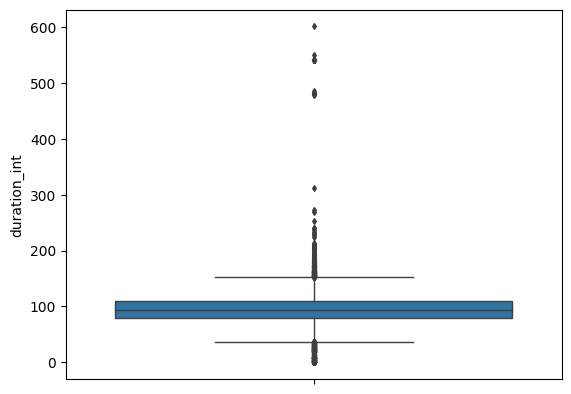

In [15]:
sns.boxplot(y = df_movie['duration_int'], data = df_movie, 
            fliersize = 3, # Tamaño de los atípicos
            linewidth = 1)  # Grosor de las líneas

<AxesSubplot: ylabel='duration_int'>

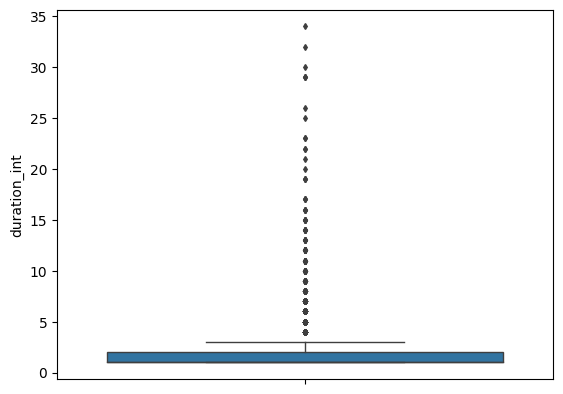

In [16]:
sns.boxplot(y = df_tv_show['duration_int'], data = df_tv_show,
            fliersize = 3, # Tamaño de los atípicos
            linewidth = 1)  # Grosor de las líneas

C:\Users\claud\AppData\Local\Temp\ipykernel_24768\1754498450.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_movie.corr()


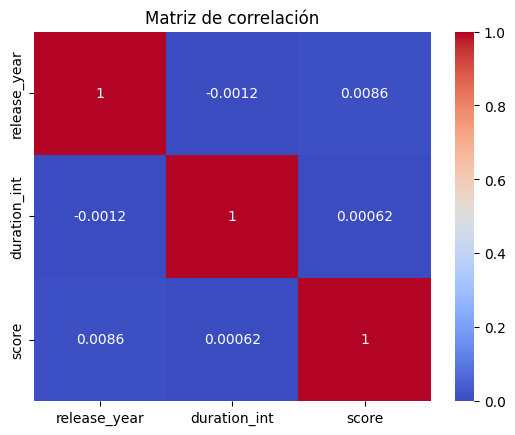

In [17]:
correlation_matrix = df_movie.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

C:\Users\claud\AppData\Local\Temp\ipykernel_24768\3219531317.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_tv_show.corr()


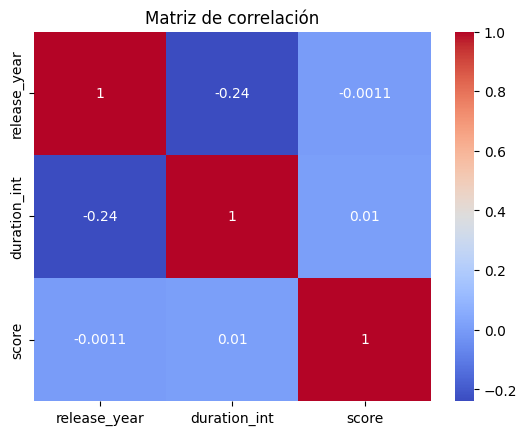

In [18]:
correlation_matrix = df_tv_show.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

En ambos dataframes las correlaciones entre variables en baja por lo tanto a priori entiendo que no hay datos redundantes. Al no haber numeros cercanos al 1 o -1 no hay variables que aumenten proporcional o inversamente proporcional, entonces cada elemento mide una característica diferente e independiente  
Por ejemplo, que un producto dure más o menos tiempo (minutos o temporadas) no guarda una fuerte correlación con el puntaje ni con el año que fue realizado. Por lo tanto, no es parámetro válido decir que si una pelicula dura mucho va a ser buena o fue hecha hace varios años ya que antes las peliculas duraban más

<AxesSubplot: xlabel='duration_int', ylabel='score'>

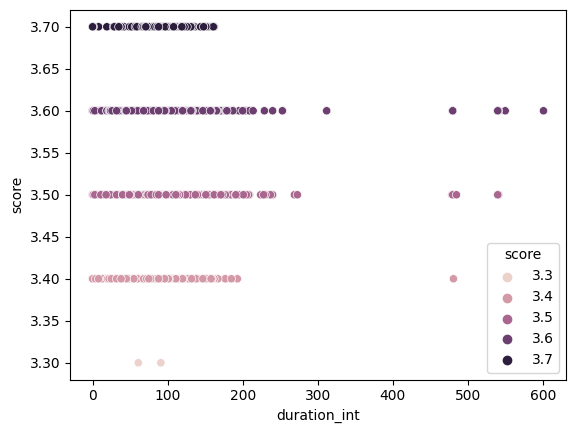

In [19]:
sns.scatterplot(x = df_movie['duration_int'], y = df_movie['score'],
                hue = df_movie['score'])

<AxesSubplot: xlabel='duration_int', ylabel='score'>

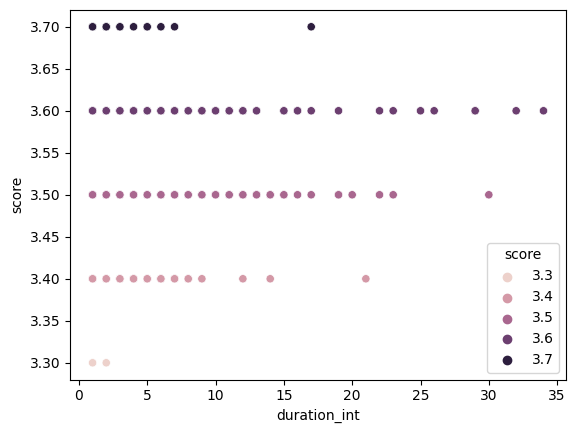

In [20]:
sns.scatterplot(x = df_tv_show['duration_int'], y = df_tv_show['score'],
                hue = df_tv_show['score'])